<a href="https://colab.research.google.com/github/rajcm17/OIBSIP/blob/main/Task1/oasis_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Data Loadong using pandas

In [2]:
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/retail_sales_dataset.csv")

In [15]:
#To print few rows of the dataset(0-4)
print(df1.head())
#To get the complete information about the dataset
print(df1.info())
#To print column names in the list form
print(df1.columns.tolist())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

2. Data Cleaning using different methods.

In [18]:
#Correcting the format the data
df1['Date'] = pd.to_datetime(df1['Date'])
print(df1['Date'])
df1['Product Category'] = pd.to

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]


In [20]:
# Removes row which has null values
df1.dropna(inplace=True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [22]:
#To check all duplcates (row wise)
df1.duplicated().sum()

np.int64(0)

In [24]:
print(df1['Total Amount'].head())

0     150
1    1000
2      30
3     500
4     100
Name: Total Amount, dtype: int64


In [28]:
#To cross verify
df1['Total Amount'] = df1['Quantity'] * df1['Price per Unit']
print(df1['Total Amount'].head())

0     150
1    1000
2      30
3     500
4     100
Name: Total Amount, dtype: int64


3. Descriptive Statistics

In [29]:
#To analyze different statistics of the columns
print(df1.describe(include='all'))

        Transaction ID                           Date Customer ID  Gender  \
count      1000.000000                           1000        1000    1000   
unique             NaN                            NaN        1000       2   
top                NaN                            NaN    CUST1000  Female   
freq               NaN                            NaN           1     510   
mean        500.500000  2023-07-03 00:25:55.200000256         NaN     NaN   
min           1.000000            2023-01-01 00:00:00         NaN     NaN   
25%         250.750000            2023-04-08 00:00:00         NaN     NaN   
50%         500.500000            2023-06-29 12:00:00         NaN     NaN   
75%         750.250000            2023-10-04 00:00:00         NaN     NaN   
max        1000.000000            2024-01-01 00:00:00         NaN     NaN   
std         288.819436                            NaN         NaN     NaN   

               Age Product Category     Quantity  Price per Unit  Total Amo

In [31]:
#To get the differet categories of column which is an object
print(df1['Product Category'].value_counts())
print(df1['Gender'].value_counts())

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64
Gender
Female    510
Male      490
Name: count, dtype: int64


In [36]:
#To find the mean of the data
print(df1['Age'].mean())
print(df1['Total Amount'].mean())
print(df1['Quantity'].mean())
print(df1['Price per Unit'].mean())

41.392
456.0
2.514
179.89


In [37]:
#To find the standard deviation of the data
print(df1['Age'].std())
print(df1['Total Amount'].std())
print(df1['Quantity'].std())
print(df1['Price per Unit'].std())

13.681429659122532
559.997631555123
1.1327343409145405
189.68135627129138


**4. Time Series Analysis**

> It is used to analyze the trends over a period of time.



In [39]:
#Analysing the sales using date and total amount
sales_per_day = df1.groupby('Date')['Total Amount'].sum()
print(sales_per_day)

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64


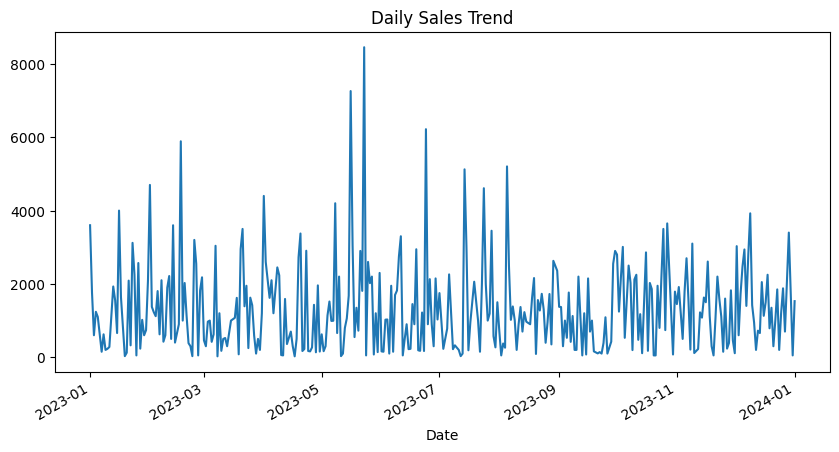

In [40]:
import matplotlib.pyplot as plt

#Using visual analysis
sales_per_day.plot(figsize=(10,5))
plt.title("Daily Sales Trend")
plt.show()


In [44]:
# For monthly or weekly data analysis
weekly_sales = sales_per_day.resample('W').sum()
monthly_sales = sales_per_day.resample('M').sum()
print(weekly_sales)
print(monthly_sales)

Date
2023-01-01     3600
2023-01-08     6100
2023-01-15     4850
2023-01-22     8215
2023-01-29     9845
2023-02-05    13070
2023-02-12     8365
2023-02-19    13815
2023-02-26     7645
2023-03-05     7155
2023-03-12     6090
2023-03-19     4075
2023-03-26    13085
2023-04-02     9590
2023-04-09     9605
2023-04-16     3060
2023-04-23     9925
2023-04-30     4280
2023-05-07     5735
2023-05-14     9050
2023-05-21    17515
2023-05-28    17210
2023-06-04     6005
2023-06-11    11770
2023-06-18     4250
2023-06-25    11820
2023-07-02     8260
2023-07-09     4315
2023-07-16     8645
2023-07-23     6160
2023-07-30    13095
2023-08-06    10610
2023-08-13     6585
2023-08-20     6980
2023-08-27     8945
2023-09-03     8385
2023-09-10     5240
2023-09-17     6375
2023-09-24     1895
2023-10-01     9865
2023-10-08    12980
2023-10-15     7825
2023-10-22     8970
2023-10-29    12140
2023-11-05     8730
2023-11-12     7910
2023-11-19     9475
2023-11-26     7760
2023-12-03     6650
2023-12-10    1

**5. Customer Analysis**

In [49]:
#Customer analysis based total amount for they purchased.
df1['Customer ID'].nunique()
customer_sales = df1.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
print(customer_sales)

Customer ID
CUST015    2000
CUST412    2000
CUST970    2000
CUST547    2000
CUST281    2000
           ... 
CUST379      25
CUST952      25
CUST371      25
CUST397      25
CUST955      25
Name: Total Amount, Length: 1000, dtype: int64


<Axes: xlabel='Price per Unit'>

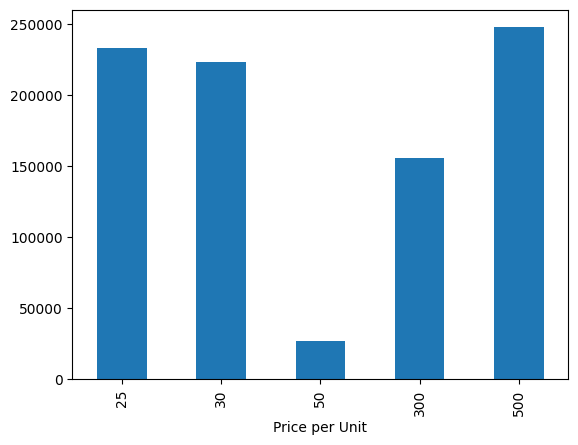

In [58]:
#Analysis using customer demography(Type)
df1.groupby('Gender')['Total Amount'].sum().plot(kind='bar')

<Axes: xlabel='Price per Unit'>

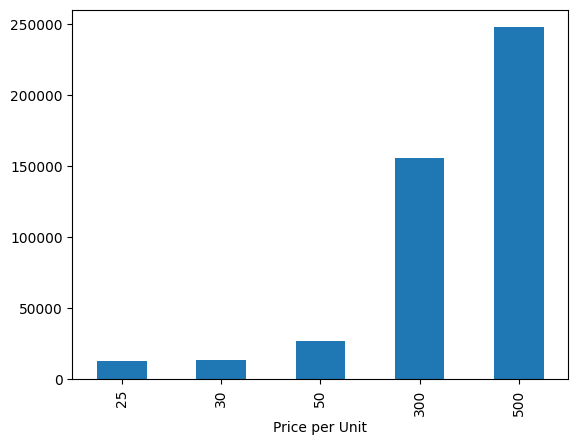

In [60]:
df1.groupby('Price per Unit')['Total Amount'].sum().plot(kind='bar')


In [64]:
df1.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)


,Quantity
Product Category,
Clothing,894
Electronics,849
Beauty,771


<Axes: xlabel='Product Category'>

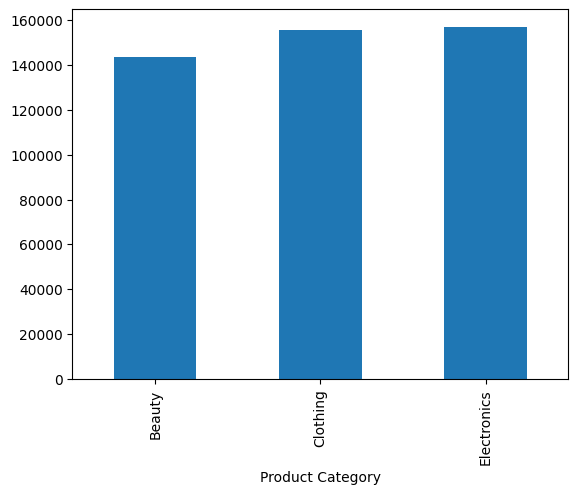

In [59]:
df1.groupby('Product Category')['Total Amount'].sum().plot(kind='bar')